## S09 T01: Tasca Feature Engineering - Eduardo Baffi

#### Descripció
Aprèn a gestionar paràmetres amb Python.

### Nivell 1
#### - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. 

Estandaritza els atributs numèrics amb StandardScaler.

In [184]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset European Soccer Database
25k+ matches, players & teams attributes for European Professional Football

Source: https://www.kaggle.com/hugomathien/soccer

In [27]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
player_attrib_df = pd.read_sql_query("SELECT * from Player_Attributes", con)

# Verify that result of SQL query is stored in the dataframe
print(player_attrib_df.head())

con.close()

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [43]:
pd.set_option('display.max_columns', None)
player_attrib_df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,0,1
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1


In [31]:
con = sqlite3.connect("database.sqlite")
player_df = pd.read_sql_query("SELECT * from Player", con)

print(player_df.head())

con.close()

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  


In [32]:
player_df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [33]:
player_attrib_df.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [34]:
# Turn categorical variable using dummy (seiers of zeros and ones)
# The first transformation: attirbute 'preferred_foot'
dummy_1 = pd.get_dummies(player_attrib_df['preferred_foot'])
dummy_1.head()

,left,right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
# The new columns are added to the original dataset
player_attrib_df = player_attrib_df.merge(dummy_1, left_index=True, right_index=True)
player_attrib_df.rename(columns={'left': 'left_foot', 'right': 'right_foot'}, inplace=True)
player_attrib_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1


In [36]:
player_attrib_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'left_foot', 'right_foot'],
      dtype='object')

In [41]:
player_attrib_df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [42]:
player_attrib_df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [ ]:
# The objective is to transform the categorical columns 'attacking_work_rate','defensive_work_rate' using dummies.
# Many of the values of these columns are not clear and the source of the dataset does not explain their meaing clearly.
# Because of that, only the rows with the following values will be maintened: 'high', 'medium' and 'low'
# These values represent almost 96% of the available data and excluding around 4% of the 183.978 rows is not a considerable risk in this exercise.

In [65]:
values_list = ['medium', 'high', 'low']
filtered_df = player_attrib_df[player_attrib_df['attacking_work_rate'].isin(values_list)&player_attrib_df['defensive_work_rate'].isin(values_list)]
filtered_df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,0,1
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,0,1


In [66]:
pd.unique(filtered_df.attacking_work_rate)

array(['medium', 'high', 'low'], dtype=object)

In [67]:
pd.unique(filtered_df.defensive_work_rate)

array(['medium', 'high', 'low'], dtype=object)

In [78]:
# Turn the remaining categorical variables using dummy 
# Transformation: attirbutes 'attacking_work_rate' and 'defensive_work_rate'
dummy_2 = pd.get_dummies(filtered_df, columns=['attacking_work_rate','defensive_work_rate'])
dummy_2.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1,0,0,1,0,0,1


In [ ]:
# Standardization of numeric features using StandardScaler from sklearn.

In [101]:
scaled_features = dummy_2.copy()

In [102]:
scaled_features.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'left_foot',
       'right_foot', 'attacking_work_rate_high', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium'],
      dtype='object')

In [103]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

col_names = ['potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve',
             'free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance', 
             'shot_power','jumping','stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 
             'penalties', 'marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning',
             'gk_reflexes']
features = scaled_features[col_names]
# The feature 'overall_rating' was not included to be used as a reference to interpretation afeter the standardization

# Scale the data
Xstd = ss.fit_transform(features.values)
print (Xstd.mean(), Xstd.std())

5.36690757248248e-18 0.9999999999999996


In [104]:
print(Xstd[0])

[-0.38293991 -0.35993832 -0.31778603  0.83267349 -0.10872473 -0.3053714
 -0.47154882 -0.44320137 -0.58478906  0.4758424  -0.95541419 -0.59413997
 -0.32801352 -0.54423802 -2.1032575  -0.01545619 -0.43068877 -0.81716858
 -0.9884104   0.70825813 -1.0043063   0.62317448  0.93008677 -0.58215086
 -0.25643118 -0.446208    0.86021717  0.86693797  0.9700907  -0.51711635
 -0.30842668 -0.48911492 -0.49479207 -0.48071328]


In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xstd, scaled_features.overall_rating.values)

print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

Intercept:  68.69085665953304
Coefficient:  [ 2.48048836  0.39528529  0.21540638  1.14571351  0.70940423  0.07774567
 -0.24121582  0.2113097   0.2208774   0.10531971  2.06093123  0.08774182
  0.11396723 -0.11578393  1.9478395   0.10183892  0.27218001  0.16765199
 -0.07792195  0.74431352 -0.24443308  0.32534568  0.24746463 -0.2203694
 -0.03439383  0.23318336  0.68267459  0.05047554 -0.61005593  2.70280671
  0.533426   -0.72667741  0.9098144   0.44406319]


Example of interpretation of the results:

For 1 standard deviation increase in free kick_accuracy estimates 0.2208774 points in overall rating.
For 1 standard deviation increase in ball control estimate 2.06093123 points in overall rating.

### Nivell 2
#### - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [106]:
# Principal Component Analysis (PCA)
# Before applying PCD, let`s standardize the data including the feature 'overall_rating' which was not included in the las exercise.

In [108]:
features = ['overall_rating','potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve',
             'free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance', 
             'shot_power','jumping','stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 
             'penalties', 'marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning',
             'gk_reflexes']

# Separating out the features
x = scaled_features.loc[:, features].values
# Separating out the target
y = scaled_features.loc[:,['player_fifa_api_id']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.24074335, -0.38293991, -0.35993832, ..., -0.48911492,
        -0.49479207, -0.48071328],
       [-0.24074335, -0.38293991, -0.35993832, ..., -0.48911492,
        -0.49479207, -0.48071328],
       [-0.95264093, -1.14294114, -0.35993832, ..., -0.48911492,
        -0.49479207, -0.48071328],
       ...,
       [ 1.1830518 ,  0.9850623 ,  1.0884887 , ...,  2.51732264,
         0.25091852,  0.2162522 ],
       [ 1.32543132,  1.13706255,  1.0884887 , ...,  2.51732264,
         0.25091852,  0.2162522 ],
       [ 1.61019035,  1.13706255,  1.0884887 , ...,  2.7559288 ,
        -0.55693461, -0.07415008]])

In [112]:
scaled_features_df = pd.DataFrame(x, index=scaled_features.index, columns=scaled_features.loc[:, features].columns)
scaled_features_df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.240743,-0.382940,-0.359938,-0.317786,0.832673,-0.108725,-0.305371,-0.471549,-0.443201,-0.584789,0.475842,-0.955414,-0.594140,-0.328014,-0.544238,-2.103257,-0.015456,-0.430689,-0.817169,-0.988410,0.708258,-1.004306,0.623174,0.930087,-0.582151,-0.256431,-0.446208,0.860217,0.866938,0.970091,-0.517116,-0.308427,-0.489115,-0.494792,-0.480713
1,-0.240743,-0.382940,-0.359938,-0.317786,0.832673,-0.108725,-0.305371,-0.471549,-0.443201,-0.584789,0.475842,-0.955414,-0.594140,-0.328014,-0.544238,-2.103257,-0.015456,-0.430689,-0.817169,-0.988410,0.708258,-1.004306,0.623174,0.930087,-0.582151,-0.256431,-0.446208,0.860217,0.866938,0.970091,-0.517116,-0.308427,-0.489115,-0.494792,-0.480713
2,-0.952641,-1.142941,-0.359938,-0.317786,0.832673,-0.108725,-0.305371,-0.471549,-0.443201,-0.584789,0.475842,-0.955414,-0.594140,-0.328014,-0.544238,-2.103257,-0.015456,-0.430689,-0.817169,-0.988410,0.708258,-1.004306,0.127045,-0.555036,-0.582151,-0.256431,-0.446208,0.860217,0.727535,0.970091,-0.517116,-0.308427,-0.489115,-0.494792,-0.480713
3,-1.095020,-1.294941,-0.417875,-0.370328,0.772059,-0.179227,-0.360120,-0.527897,-0.497941,-0.640894,0.406506,-1.021197,-0.594140,-0.328014,-0.544238,-2.212709,-0.015456,-0.492677,-0.817169,-0.988410,0.708258,-1.058710,0.065028,-0.606247,-0.636310,-0.322391,-0.510493,0.718983,0.588132,0.831340,-0.576410,-0.371465,-0.536836,-0.556935,-0.538794
4,-1.095020,-1.294941,-0.417875,-0.370328,0.772059,-0.179227,-0.360120,-0.527897,-0.497941,-0.640894,0.406506,-1.021197,-0.594140,-0.328014,-0.544238,-2.212709,-0.015456,-0.492677,-0.817169,-0.988410,0.708258,-1.058710,0.065028,-0.606247,-0.636310,-0.322391,-0.510493,0.718983,0.588132,0.831340,-0.576410,-0.371465,-0.536836,-0.556935,-0.538794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,2.037329,1.745064,1.667860,1.416103,0.105299,1.865338,1.501337,1.387951,1.801122,1.603304,1.862569,1.412769,-0.133998,0.306384,0.841552,2.165365,0.594571,0.871067,-0.817169,0.371786,-0.036432,1.498249,-0.307069,1.339776,1.638369,1.986219,1.803770,-1.164145,-0.898832,-0.833671,-0.339235,0.258921,3.042256,0.250919,0.216252
183974,1.325431,0.985062,1.088489,1.363561,-0.258388,1.512826,1.501337,1.444299,1.801122,1.378884,1.099870,1.478552,-0.133998,-0.090115,0.841552,0.851943,0.594571,0.809079,-0.817169,-0.081613,-0.201919,1.063022,0.003012,0.622820,0.880143,1.986219,0.968064,-0.693363,-0.898832,-0.833671,-0.339235,0.258921,2.517323,0.250919,0.216252
183975,1.183052,0.985062,1.088489,1.100851,-0.258388,1.512826,1.501337,1.444299,1.801122,1.378884,1.099870,1.478552,-0.133998,-0.090115,0.841552,0.851943,0.594571,0.809079,-0.817169,-0.081613,-0.201919,1.063022,0.375110,0.622820,0.880143,1.986219,0.968064,-0.693363,-0.898832,-0.833671,-0.339235,0.258921,2.517323,0.250919,0.216252
183976,1.325431,1.137063,1.088489,0.733056,-0.015930,1.653831,1.501337,1.556996,1.801122,1.322779,1.099870,1.807466,-0.517450,-0.645212,0.841552,0.304683,0.594571,0.623114,-0.817169,-0.006047,-0.698379,1.335039,0.127045,0.571609,0.663507,1.986219,-0.124783,-0.881676,-0.852364,-0.833671,-0.339235,0.258921,2.517323,0.250919,0.216252


In [153]:
# PCA Projection to 2D
# The code projects the original data which has 35 dimensions into 2 dimensions.

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df

,principal component 1,principal component 2
0,1.072721,2.697769
1,1.072721,2.697769
2,1.423817,2.049063
3,1.638271,1.941689
4,1.638271,1.941689
...,...,...
176156,-4.928690,-2.937917
176157,-3.709392,-2.756971
176158,-3.688024,-2.597419
176159,-3.326732,-2.501593


In [180]:
scaled_features.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1,0,0,1,0,0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1,0,0,1,0,0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1,0,0,1,0,0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1,0,0,1,0,0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1,0,0,1,0,0,1


In [181]:
scaled_features = scaled_features.reset_index(drop=True)

PCA_df = pd.concat([principal_df,scaled_features['player_fifa_api_id']], axis = 1,join = 'inner')
#PCA_df = principal_df.merge(scaled_features.player_fifa_api_id,left_index=True,right_index=True)
PCA_df

,principal component 1,principal component 2,player_fifa_api_id
0,1.072721,2.697769,218353
1,1.072721,2.697769,218353
2,1.423817,2.049063,218353
3,1.638271,1.941689,218353
4,1.638271,1.941689,218353
...,...,...,...
176156,-4.928690,-2.937917,102359
176157,-3.709392,-2.756971,102359
176158,-3.688024,-2.597419,102359
176159,-3.326732,-2.501593,102359


In [182]:
PCA_df.player_fifa_api_id.value_counts()

193061    56
178393    56
155887    54
184431    54
184267    53
          ..
233711     2
203788     2
234141     2
233911     2
186613     1
Name: player_fifa_api_id, Length: 9926, dtype: int64

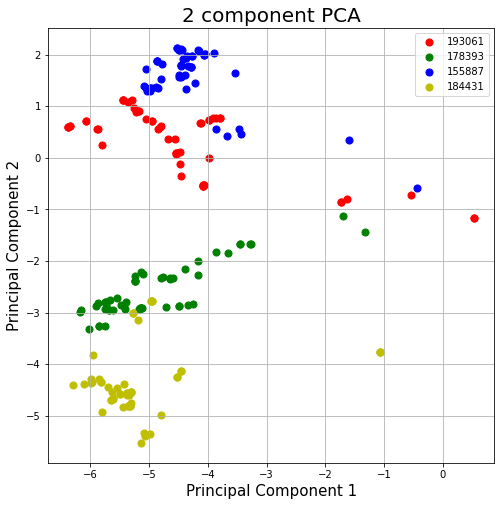

In [187]:
# Plot 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [193061, 178393, 155887,184431]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = PCA_df['player_fifa_api_id'] == target
    ax.scatter(PCA_df.loc[indicesToKeep, 'principal component 1']
               , PCA_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# There is separatio beteween some of the players used as an example.

In [188]:
pca.explained_variance_ratio_

array([0.45222354, 0.15875889])

The two components contain 61.10% of the information (variance).
There was a significant loss of information. 
Let's try PCA for the same Dataset with 4 components to check the result

In [193]:
pca4 = PCA(n_components=4)
principalComponents = pca4.fit_transform(x)
principal2_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principal2_df

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.072721,2.697765,-1.532310,0.347181
1,1.072721,2.697765,-1.532310,0.347181
2,1.423817,2.049058,-2.362332,0.530217
3,1.638271,1.941684,-2.662738,0.544385
4,1.638271,1.941684,-2.662738,0.544385
...,...,...,...,...
176156,-4.928690,-2.937922,4.109780,0.558991
176157,-3.709392,-2.756975,2.557994,0.461338
176158,-3.688024,-2.597422,2.533167,0.420785
176159,-3.326733,-2.501598,2.270996,0.275704


In [194]:
pca4.explained_variance_ratio_

array([0.45222354, 0.15875889, 0.09079296, 0.0553245 ])

The four components contain 75,7% of the information (variance). The result is much better than the 2D PCA

In [218]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


### Nivell 3
#### - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [201]:
scaled_features.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1,0,0,1,0,0,1


In [203]:
# First Step: Normalize with a method very influenced by outliers
from sklearn.preprocessing import MinMaxScaler

features = ['overall_rating','potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve',
             'free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance', 
             'shot_power','jumping','stamina', 'strength', 'long_shots','aggression', 'interceptions', 'positioning', 'vision', 
             'penalties', 'marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning',
             'gk_reflexes']
X = scaled_features[features]

minmax = MinMaxScaler()
Xn = minmax.fit_transform(X)

In [204]:
print(Xn.min(axis=0))
print(Xn.max(axis=0))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [206]:
print (Xn.std(axis=0))

[0.11513905 0.11342994 0.18361812 0.19825372 0.17007935 0.15089308
 0.19853541 0.18486159 0.19856864 0.18566399 0.15343031 0.16523398
 0.15523157 0.14835762 0.15281151 0.1156511  0.15612117 0.16981109
 0.13452133 0.1538766  0.1405298  0.19348646 0.1771957  0.20554746
 0.19853918 0.15792328 0.16548628 0.22840059 0.22894003 0.23248902
 0.18134615 0.17242703 0.2182816  0.16938983 0.1812368 ]


In [214]:
Xn_df = pd.DataFrame(Xn, index=scaled_features.index, columns=scaled_features.loc[:, features].columns)
Xn_df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
1,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
2,0.475410,0.465517,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.421053,0.462366,0.552083,0.489362,0.688172,0.691489,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
3,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158
4,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176156,0.819672,0.793103,0.882979,0.791667,0.597938,0.914894,0.826087,0.864583,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.810526,0.903226,0.906250,0.861702,0.225806,0.319149,0.301075,0.086022,0.206522,0.864583,0.200000,0.200000
176157,0.737705,0.706897,0.776596,0.781250,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000
176158,0.721311,0.706897,0.776596,0.729167,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000
176159,0.737705,0.724138,0.776596,0.656250,0.577320,0.882979,0.826087,0.895833,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.652632,0.709677,0.906250,0.542553,0.290323,0.329787,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000


In [209]:
scaled_features[features].describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,59.368441,53.096542,49.423130,57.137187,63.523754,67.747260,68.136381,66.069096,66.216279,65.202695,61.947894,67.013982,67.080018,67.440302,53.460369,60.951431,51.838188,55.748917,57.887660,54.941082,46.727908,50.343180,48.025204,14.721266,15.892661,20.249420,15.962211,16.276679
std,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,17.746763,18.268367,17.823794,14.422490,15.201569,13.039489,12.610433,12.989015,9.136463,13.114216,16.132099,11.030780,13.233425,12.085597,18.381266,16.124854,19.527064,18.464196,15.160678,15.555754,21.241315,21.520424,21.621540,16.865240,15.863331,20.955093,16.092080,17.217545
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,13.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,33.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,73.000000,77.000000,77.000000,75.000000,73.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [211]:
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      176161 non-null  float64
 1   potential           176161 non-null  float64
 2   crossing            176161 non-null  float64
 3   finishing           176161 non-null  float64
 4   heading_accuracy    176161 non-null  float64
 5   short_passing       176161 non-null  float64
 6   volleys             176161 non-null  float64
 7   dribbling           176161 non-null  float64
 8   curve               176161 non-null  float64
 9   free_kick_accuracy  176161 non-null  float64
 10  long_passing        176161 non-null  float64
 11  ball_control        176161 non-null  float64
 12  acceleration        176161 non-null  float64
 13  sprint_speed        176161 non-null  float64
 14  agility             176161 non-null  float64
 15  reactions           176161 non-nul

In [212]:
# Mathematical and visualization techniques can be used to identify outliers.
# This Dataset has a lot of numeric features to be normalized, so it is not recommended to deal with outlyers manually.
# Because of that, the RobustScaler will be used because it uses stastistics that are robust to outliers.

# apply the robust scaling in Pandas using the .median() and .quantile() methods
from sklearn.preprocessing import RobustScaler

# create a scaler object
scaler = RobustScaler()
# fit and transform the data
df_robust = pd.DataFrame(scaler.fit_transform(scaled_features_df), columns=scaled_features_df.columns)

df_robust

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.222222,-0.333333,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.000000,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
1,-0.222222,-0.333333,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.000000,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
2,-0.777778,-0.888889,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.000000,0.4375,-0.884615,-0.045455,-0.428571,-0.625000,-0.30,-0.409091,0.365854,0.250,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
3,-0.888889,-1.000000,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.000000,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429
4,-0.888889,-1.000000,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.000000,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176156,1.555556,1.222222,1.086957,0.774194,-0.052632,1.600000,0.892857,1.00,1.153846,1.000000,1.388889,1.285714,-0.1875,0.200000,0.529412,1.583333,0.375,0.526316,-0.714286,0.200000,-0.1250,0.884615,-0.363636,0.628571,1.083333,1.40,1.181818,-0.682927,-0.625,-0.547619,-0.166667,1.285714,10.428571,1.285714,1.285714
176157,1.000000,0.666667,0.652174,0.741935,-0.368421,1.266667,0.892857,1.05,1.153846,0.857143,0.777778,1.357143,-0.1875,-0.133333,0.529412,0.583333,0.375,0.473684,-0.714286,-0.200000,-0.2500,0.576923,-0.136364,0.228571,0.500000,1.40,0.590909,-0.439024,-0.625,-0.547619,-0.166667,1.285714,8.857143,1.285714,1.285714
176158,0.888889,0.666667,0.652174,0.580645,-0.368421,1.266667,0.892857,1.05,1.153846,0.857143,0.777778,1.357143,-0.1875,-0.133333,0.529412,0.583333,0.375,0.473684,-0.714286,-0.200000,-0.2500,0.576923,0.136364,0.228571,0.500000,1.40,0.590909,-0.439024,-0.625,-0.547619,-0.166667,1.285714,8.857143,1.285714,1.285714
176159,1.000000,0.777778,0.652174,0.354839,-0.157895,1.400000,0.892857,1.15,1.153846,0.821429,0.777778,1.714286,-0.5000,-0.600000,0.529412,0.166667,0.375,0.315789,-0.714286,-0.133333,-0.6250,0.769231,-0.045455,0.200000,0.333333,1.40,-0.181818,-0.536585,-0.600,-0.547619,-0.166667,1.285714,8.857143,1.285714,1.285714


In [216]:
Xn_df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
1,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
2,0.475410,0.465517,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.421053,0.462366,0.552083,0.489362,0.688172,0.691489,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684
3,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158
4,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158


In [217]:
df_robust.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.222222,-0.333333,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
1,-0.222222,-0.333333,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
2,-0.777778,-0.888889,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,-0.045455,-0.428571,-0.625000,-0.30,-0.409091,0.365854,0.250,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571
3,-0.888889,-1.000000,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.0,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429
4,-0.888889,-1.000000,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.0,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429


In a first analysis, the values of MinMaxScaler and RobustScaler are kite different. In this exercise it was necessary to pay attention to outliers, so the result of RobustScaler is recommended in this case.

In [242]:
scaled_features[features].describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,59.368441,53.096542,49.423130,57.137187,63.523754,67.747260,68.136381,66.069096,66.216279,65.202695,61.947894,67.013982,67.080018,67.440302,53.460369,60.951431,51.838188,55.748917,57.887660,54.941082,46.727908,50.343180,48.025204,14.721266,15.892661,20.249420,15.962211,16.276679
std,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,17.746763,18.268367,17.823794,14.422490,15.201569,13.039489,12.610433,12.989015,9.136463,13.114216,16.132099,11.030780,13.233425,12.085597,18.381266,16.124854,19.527064,18.464196,15.160678,15.555754,21.241315,21.520424,21.621540,16.865240,15.863331,20.955093,16.092080,17.217545
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,13.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,33.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,73.000000,77.000000,77.000000,75.000000,73.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


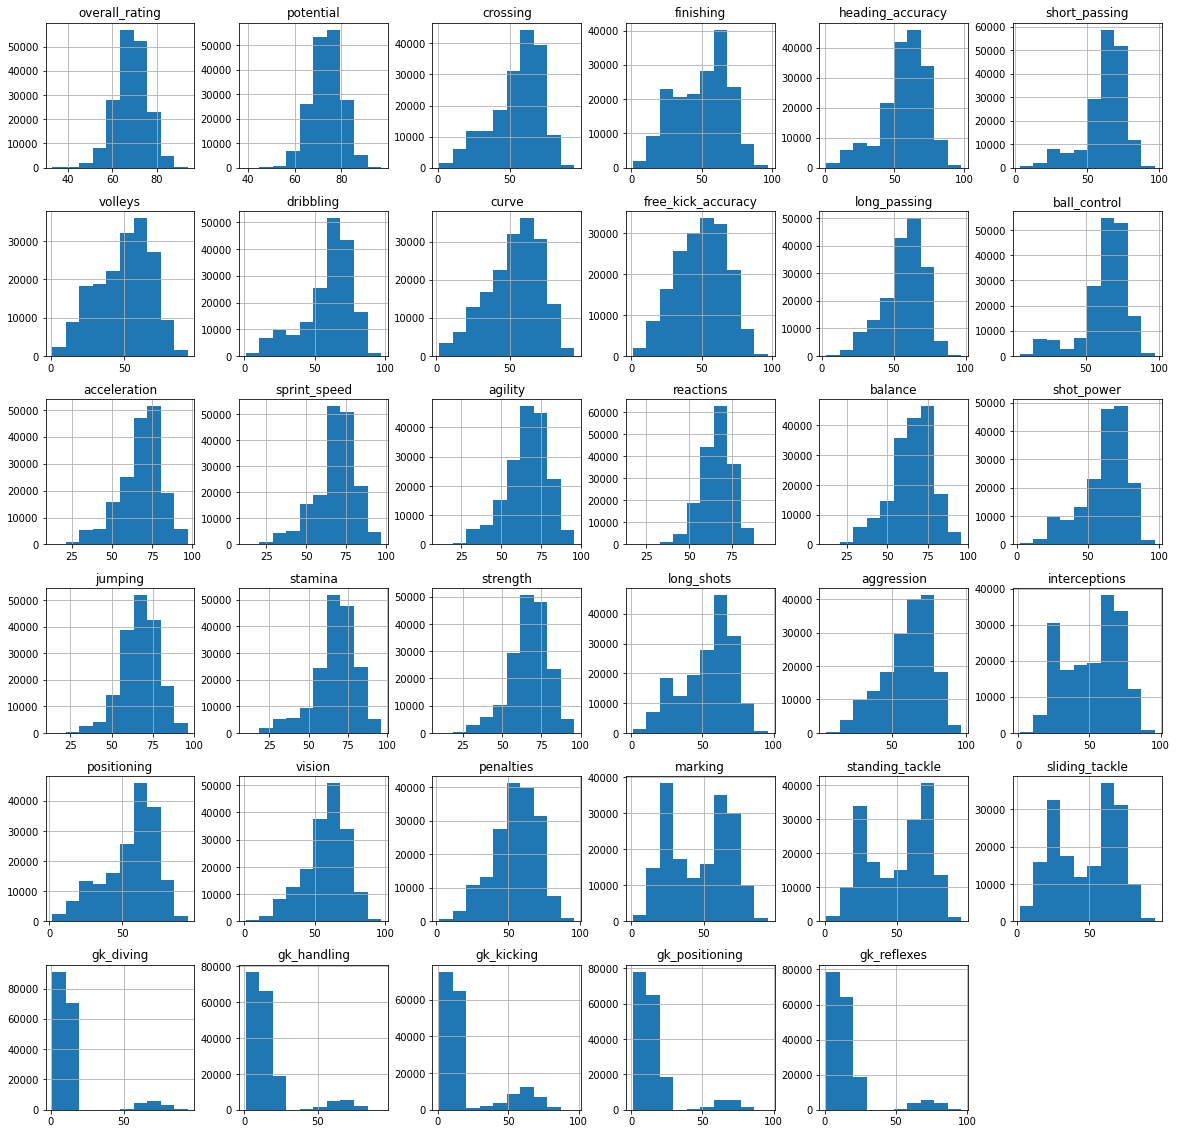

In [257]:
scaled_features[features].hist(figsize=(20,20))
plt.show()

In [246]:
# Now three features of the Dataset are choosen in order to identify outliers with skewness and visulization

print(scaled_features[features].skew())


overall_rating       -0.201120
potential            -0.042018
crossing             -0.750405
finishing            -0.296938
heading_accuracy     -0.893757
short_passing        -1.210907
volleys              -0.350430
dribbling            -1.029539
curve                -0.473496
free_kick_accuracy   -0.212678
long_passing         -0.661377
ball_control         -1.357055
acceleration         -0.746467
sprint_speed         -0.816575
agility              -0.601091
reactions            -0.495349
balance              -0.575544
shot_power           -0.958836
jumping              -0.512790
stamina              -0.920337
strength             -0.633764
long_shots           -0.609913
aggression           -0.628090
interceptions        -0.281568
positioning          -0.731415
vision               -0.650129
penalties            -0.465242
marking              -0.093159
standing_tackle      -0.238298
sliding_tackle       -0.174042
gk_diving             2.963519
gk_handling           2.741149
gk_kicki

In [ ]:
# After analysing plots and skewness values, I choose 3 features with a right-skewed distribution: 'gk_diving','gk_handling','gk_reflexes'

In [247]:
scaled_features[['gk_diving','gk_handling','gk_reflexes']].describe()

,gk_diving,gk_handling,gk_reflexes
count,176161.000000,176161.000000,176161.000000
mean,14.721266,15.892661,16.276679
std,16.865240,15.863331,17.217545
min,1.000000,1.000000,1.000000
25%,7.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000
75%,13.000000,15.000000,15.000000
max,94.000000,93.000000,96.000000


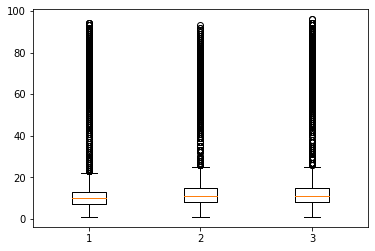

In [248]:
plt.boxplot(scaled_features[['gk_diving','gk_handling','gk_reflexes']])
plt.show()

In [264]:
# Quantile-based Flooring and Capping

print(scaled_features['gk_diving'].quantile(0.10))
print(scaled_features['gk_diving'].quantile(0.90))
print("")
print(scaled_features['gk_handling'].quantile(0.10))
print(scaled_features['gk_handling'].quantile(0.90))
print("")
print(scaled_features['gk_reflexes'].quantile(0.10))
print(scaled_features['gk_reflexes'].quantile(0.90))

6.0
15.0

6.0
23.0

6.0
23.0


In [269]:
#Removing outliers

scaled_features['gk_diving'] = np.where(scaled_features['gk_diving'] <6.0, 6.0,scaled_features['gk_diving'])
scaled_features['gk_diving'] = np.where(scaled_features['gk_diving'] >23.0, 23.0,scaled_features['gk_diving'])
print(f"gk_handling: {scaled_features['gk_diving'].skew()}")
print("")
scaled_features['gk_handling'] = np.where(scaled_features['gk_handling'] <6.0, 6.0,scaled_features['gk_handling'])
scaled_features['gk_handling'] = np.where(scaled_features['gk_handling'] >23.0, 23.0,scaled_features['gk_handling'])
print(f"gk_handling: {scaled_features['gk_handling'].skew()}")
print("")
scaled_features['gk_reflexes'] = np.where(scaled_features['gk_reflexes'] <6.0, 6.0,scaled_features['gk_reflexes'])
scaled_features['gk_reflexes'] = np.where(scaled_features['gk_reflexes'] >23.0, 23.0,scaled_features['gk_reflexes'])
print(f"gk_reflexes: {scaled_features['gk_reflexes'].skew()}")

gk_handling: 1.1940692981497998

gk_handling: 0.7671675757636436

gk_reflexes: 0.7719749063024559


The skewness comes out much better now. 

In [270]:
scaled_features.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left_foot,right_foot,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.00000,176161.00000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,91840.417033,167305.852311,138278.214866,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,59.368441,53.096542,49.423130,57.137187,63.523754,67.747260,68.136381,66.069096,66.216279,65.202695,61.947894,67.013982,67.080018,67.440302,53.460369,60.951431,51.838188,55.748917,57.887660,54.941082,46.727908,50.343180,48.025204,11.057782,12.430226,20.249420,15.962211,12.399362,0.24443,0.75557,0.242681,0.048473,0.708846,0.153110,0.104592,0.742298
std,53130.276666,52383.037960,137882.077955,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,17.746763,18.268367,17.823794,14.422490,15.201569,13.039489,12.610433,12.989015,9.136463,13.114216,16.132099,11.030780,13.233425,12.085597,18.381266,16.124854,19.527064,18.464196,15.160678,15.555754,21.241315,21.520424,21.621540,4.615259,5.455789,20.955093,16.092080,5.473339,0.42975,0.42975,0.428705,0.214764,0.454296,0.360094,0.306028,0.437370
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,13.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,6.000000,6.000000,1.000000,1.000000,6.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45788.000000,157304.000000,35495.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,33.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91812.000000,183900.000000,89827.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,137810.000000,200256.000000,193174.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,73.000000,77.000000,77.000000,75.000000,73.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,0.00000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,

In [271]:
# Results after removing outliers
scaled_features[['gk_diving','gk_handling','gk_reflexes']].describe()

,gk_diving,gk_handling,gk_reflexes
count,176161.000000,176161.000000,176161.000000
mean,11.057782,12.430226,12.399362
std,4.615259,5.455789,5.473339
min,6.000000,6.000000,6.000000
25%,7.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000
75%,13.000000,15.000000,15.000000
max,23.000000,23.000000,23.000000


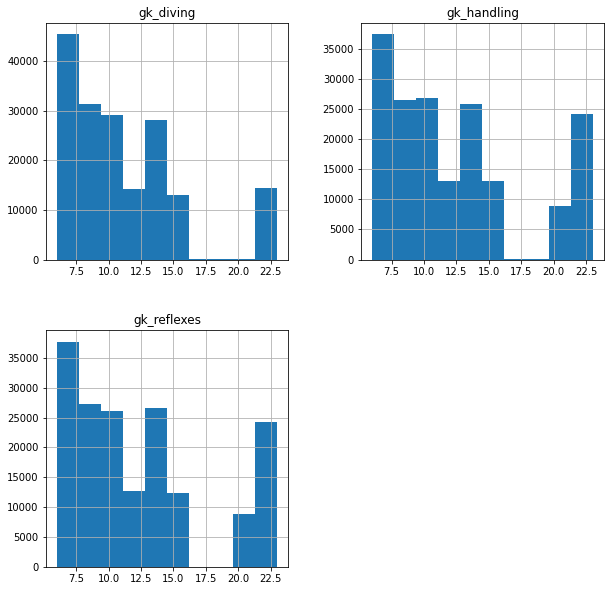

In [272]:
scaled_features[['gk_diving','gk_handling','gk_reflexes']].hist(figsize=(10,10))
plt.show()

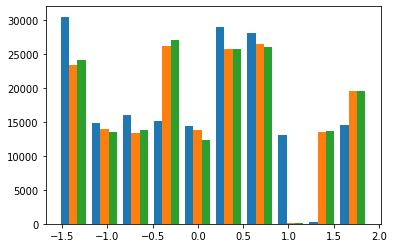

In [281]:
# Normalize with PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Power transform the raw data
pt = PowerTransformer(method='yeo-johnson', standardize=True)
col = ['gk_diving','gk_handling','gk_reflexes']
data_result = pt.fit_transform(scaled_features[col])
# Histogram of the transformed data
plt.hist(data_result, bins=10)
plt.show()

Values centered on the mean of zero and a standard deviation of 1.0.